In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
source_or_target_em = []
source_or_target_f1 = []

model_name_em = []
model_name_f1 = []

model_list = ['BioLinkBERT', 'PubMedBERT', 'BioELECTRA', 'BioBERT',
              'SciBERT', 'ClinicalBERT', 'RoBERTa', 'BlueBERT', 'BERT']

train_data = []

em = []
f1 = []

source_em_bio = [64.25,
59.66,
52.40,
49.31,
54.75,
38.10,
50.91,
27.21,
41.41]
source_or_target_em.extend(['Source']*9)
model_name_em.extend(model_list)
em.extend(source_em_bio)

target_em_bio = [16.68,
10.76,
3.19,
5.01,
8.11,
3.01,
8.66,
1.37,
2.28]
source_or_target_em.extend(['Target']*9)
model_name_em.extend(model_list)
em.extend(target_em_bio)

source_f1_bio = [74.41,
72.69,
64.78,
61.34,
68.79,
55.33,
64.99,
40.70,
54.09]
source_or_target_f1.extend(['Source']*9)
model_name_f1.extend(model_list)
f1.extend(source_f1_bio)

target_f1_bio = [38.16,
28.44,
14.57,
18.55,
23.87,
14.97,
27.61,
11.87,
15.33]
source_or_target_f1.extend(['Target']*9)
model_name_f1.extend(model_list)
f1.extend(target_f1_bio)

train_data.extend(['BioASQ']*18)



source_em_emr = [82.59,
83.42,
76.78,
76.51,
81.85,
79.97,
83.23,
79.21,
80.71]
source_or_target_em.extend(['Source']*9)
model_name_em.extend(model_list)
em.extend(source_em_emr)

target_em_emr = [0.55,
0.82,
0.27,
0.27,
0.18,
0.27,
0.27,
0.36,
0.55]
source_or_target_em.extend(['Target']*9)
model_name_em.extend(model_list)
em.extend(target_em_emr)

source_f1_emr = [93.56,
93.52,
90.68,
90.65,
93.23,
91.48,
93.49,
89.83,
92.17]
source_or_target_f1.extend(['Source']*9)
model_name_f1.extend(model_list)
f1.extend(source_f1_emr)

target_f1_emr = [33.11,
30.22,
19.88,
28.81,
32.29,
27.42,
33.73,
33.27,
31.80]
source_or_target_f1.extend(['Target']*9)
model_name_f1.extend(model_list)
f1.extend(target_f1_emr)

train_data.extend(['emrQA']*18)




source_em_sq = [82.39,
81.78,
78.55,
80.79,
78.98,
77.56,
81.77,
65.18,
80.54]
source_or_target_em.extend(['Source']*9)
model_name_em.extend(model_list)
em.extend(source_em_sq)

target_em_sq = [54.97,
55.15,
49.41,
53.69,
52.32,
49.50,
49.50,
40.38,
48.59]
source_or_target_em.extend(['Target']*9)
model_name_em.extend(model_list)
em.extend(target_em_sq)

source_f1_sq = [89.78,
89.36,
87.06,
88.48,
86.92,
85.95,
88.87,
75.10,
88.09]
source_or_target_f1.extend(['Source']*9)
model_name_f1.extend(model_list)
f1.extend(source_f1_sq)

target_f1_sq = [78.15,
77.42,
74.11,
76.80,
75.32,
73.21,
73.35,
65.24,
72.26]
source_or_target_f1.extend(['Target']*9)
model_name_f1.extend(model_list)
f1.extend(target_f1_sq)

train_data.extend(['SQuAD']*18)


In [5]:
df = pd.DataFrame()

df['EM'] = em
df['F1'] = f1
df['Model name'] = model_name_em
df['Test domain'] = source_or_target_em
df['Training data'] = train_data

In [6]:
def make_decimal(num):
  return num/100

In [7]:
df['EM'] = df['EM'].apply(make_decimal)
df['F1'] = df['F1'].apply(make_decimal)
df.sample(5)

,EM,F1,Model name,Test domain,Training data
40,0.7898,0.8692,SciBERT,Source,SQuAD
10,0.1076,0.2844,PubMedBERT,Target,BioASQ
34,0.0036,0.3327,BlueBERT,Target,emrQA
15,0.0866,0.2761,RoBERTa,Target,BioASQ
22,0.8185,0.9323,SciBERT,Source,emrQA


/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/net/kdinxidk03/opt/NFS/75y/anaconda3/envs/QA/lib/python3.7/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


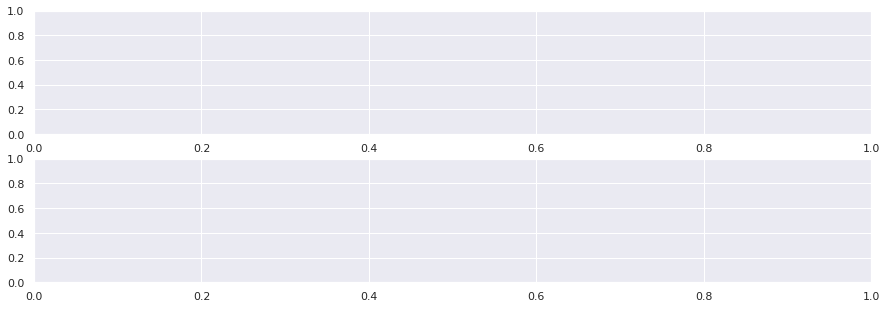

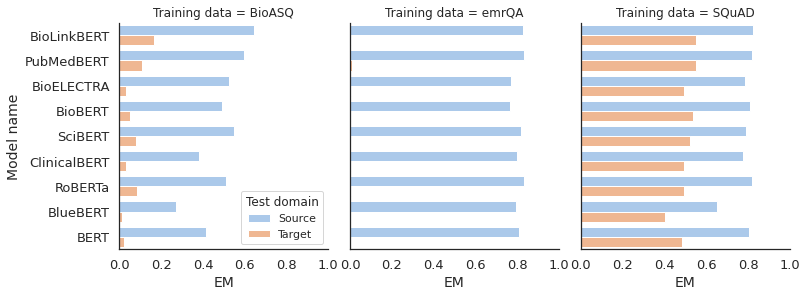

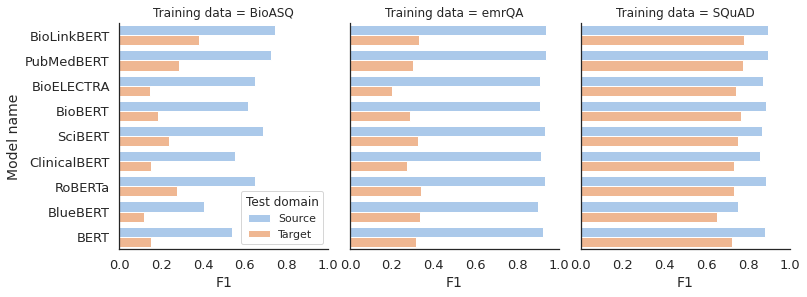

In [9]:
rc = {'figure.figsize':(3,3),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)


# which = 'F1'
sns.set(rc={'figure.figsize':(5,5)})

fig, axs = plt.subplots(2,1, figsize=(15,5))

sns.set(style='white')
g1 = sns.catplot(ax=axs[0], kind = "bar", data=df, col='Training data', y='Model name', x='EM',
            hue='Test domain',
            orient = 'h',
            errwidth = 1,
            alpha = 1,
            height=4, aspect=9/10,
            legend_out=False,
            palette='pastel',
            
#             order=sorted(df.model.unique()), col_order=sorted(df.train.unique())
           )

g2 = sns.catplot(ax=axs[1], kind = "bar", data=df, col='Training data', y='Model name', x='F1',
            hue='Test domain',
            orient = 'h',
            errwidth = 1,
            alpha = 1,
            height=4, aspect=9/10,
            legend_out=False,
            palette='pastel',
            
#             order=sorted(df.model.unique()), col_order=sorted(df.train.unique())
           )

g1.set_xticklabels(size=13)
g1.set_yticklabels(model_list, size=13)
g1.set_xlabels('EM', fontsize=14)
g1.set_ylabels('Model name', fontsize=14)


g2.set_xticklabels(size=13)
g2.set_yticklabels(model_list, size=13)
g2.set_xlabels('F1', fontsize=14)
g2.set_ylabels('Model name', fontsize=14)

plt.show()



# Supervised plots

In [15]:
target_only_em  = [0.5647,
0.5253,
0.5145,
0.5789,
0.3714]
simultaneous_em = [0.6588,
0.6646,
0.6805,
0.7237,
0.7143]
sequential_em   = [0.7529,
0.7911,
0.7676,
0.8070,
0.7636]
bioadapt_em     = [0.8118,
0.7658,
0.7925,
0.8070,
0.7766]

In [16]:
target_only_f1  = [0.7876,
0.7334,
0.7495,
0.7708,
0.6157]
simultaneous_f1 = [0.8627,
0.8683,
0.8373,
0.8844,
0.8779]
sequential_f1   = [0.8963,
0.9264,
0.8997,
0.9190,
0.8992]
bioadapt_f1     = [0.9333,
0.9057,
0.9204,
0.9218,
0.9071]

In [17]:
yl_target_only_em = [0.4578,
0.4468,
0.4511,
0.5145,
0.3230]
yl_simultaneous_em = [0.5566,
0.5904,
0.6213,
0.6653,
0.6690]
yl_sequential_em = [0.6599,
0.7273,
0.7140,
0.7555,
0.7211]
yl_bioadapt_em = [0.7274,
0.6993,
0.7411,
0.7555,
0.7349]

yu_target_only_em = [0.6716,
0.6038,
0.5779,
0.6434,
0.4198]
yu_simultaneous_em = [0.7611,
0.7387,
0.7397,
0.7820,
0.7596]
yu_sequential_em = [0.8460,
0.8550,
0.8212,
0.8585,
0.8062]
yu_bioadapt_em = [0.8961,
0.8324,
0.8440,
0.8585,
0.8184]



yl_target_only_f1 = [0.7204,
0.6773,
0.7073,
0.7256,
0.5767]
yl_simultaneous_f1 = [0.8102,
0.8304,
0.7998,
0.8520,
0.8534]
yl_sequential_f1 = [0.8463,
0.8955,
0.8685,
0.8903,
0.8762]
yl_bioadapt_f1 = [0.8944,
0.8705,
0.8927,
0.8934,
0.8843]

yu_target_only_f1 = [0.8547,
0.7895,
0.7917,
0.8160,
0.6548]
yu_simultaneous_f1 = [0.9151,
0.9062,
0.8749,
0.9168,
0.9025]
yu_sequential_f1 = [0.9463,
0.9573,
0.9310,
0.9477,
0.9222]
yu_bioadapt_f1 = [0.9723,
0.9408,
0.9480,
0.9502,
0.9300]


In [3]:
fold_ls = list(range(1,6))

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame()
em = []
f1 = []
which_exp = []
folds = []

em.extend(target_only_em)
which_exp.extend(['BioLinkBERT-cpgQA']*5)
folds.extend(fold_ls)
em.extend(simultaneous_em)
which_exp.extend(['BioLinkBERT-SQuAD-cpgQA (Simultaneous)']*5)
folds.extend(fold_ls)
em.extend(sequential_em)
which_exp.extend(['BioLinkBERT-SQuAD-cpgQA (Sequential)']*5)
folds.extend(fold_ls)
em.extend(bioadapt_em)
which_exp.extend(['BioADAPT-MRC (Supervised)']*5)
folds.extend(fold_ls)

f1.extend(target_only_f1)
f1.extend(simultaneous_f1)
f1.extend(sequential_f1)
f1.extend(bioadapt_f1)

df['EM'] = np.array(em)
df['F1'] = np.array(f1)
df['Model'] = which_exp
df['Folds'] = folds

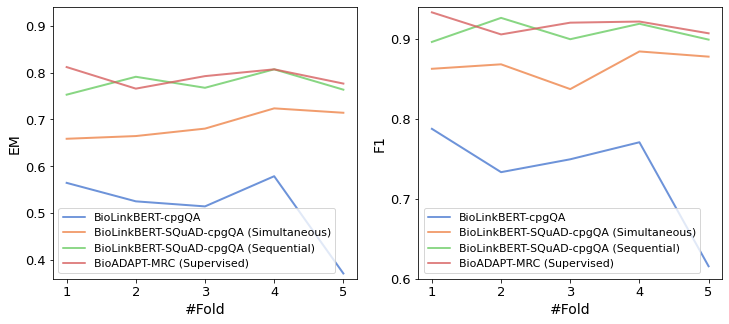

In [11]:
import matplotlib as mpl
label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

fig, axs = plt.subplots(1,2, figsize=(12,5))
sns.lineplot(ax = axs[0], data=df, x="Folds", y="EM",
             hue="Model",
            palette='muted',
            linestyle='-',
            linewidth = 2,
            alpha = 0.8
            )
sns.lineplot(ax = axs[1], data=df, x="Folds", y="F1",
             hue="Model",
            palette='muted',
            linestyle='-',
            linewidth = 2,
            alpha = 0.8
            )

axs[0].legend(loc='best', fontsize =11)
axs[0].set_xlabel('#Fold', size=14)
axs[0].set_ylabel('EM', size=14)
axs[0].set_ylim(0.36, 0.94)

axs[1].legend(loc='best', fontsize =11)
axs[1].set_xlabel('#Fold', size=14)
axs[1].set_ylabel('F1', size=14)
axs[1].set_ylim(0.6, 0.94)

axs[0].set_yticks(np.arange(0.4, .94, 0.1))
axs[1].set_yticks(np.arange(0.6, .94, 0.1))

plt.show()

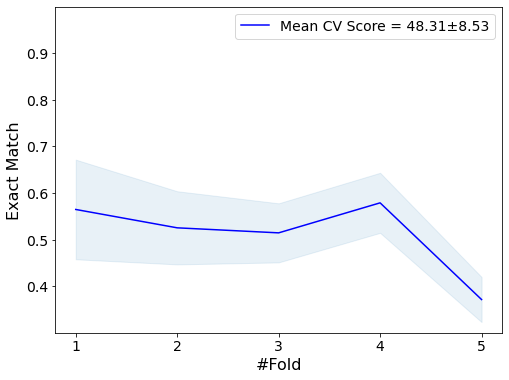

In [79]:
import matplotlib as mpl
label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

x = range(1,6)
colors = ['blue', 'orange', 'green', 'red']
labels = ['BioLinkBERT-cpgQA',
          'BioLinkBERT-SQuAD-cpgQA (Simultaneous)',
          'BioLinkBERT-SQuAD-cpgQA (Sequential)',
          'BioADAPT-MRC (Supervised)']

# labels = ['Traditional learning\nMean CV Score = 48.31±8.53', 'Sequential learning\nMean CV Score = 77.67±1.85']

fig, ax = plt.subplots(1,1, figsize=(8,6))


ax.plot(x,
       target_only_em,
       color=colors[0],
       label = labels[0]
        )
ax.fill_between(x, yl_target_only_em, yu_target_only_em, alpha=0.1, color=f'tab:{colors[0]}')
ax.plot(x,
       simultaneous_em,
       color=colors[1],
       label = labels[1]
        )
ax.fill_between(x, yl_simultaneous_em, yu_simultaneous_em, alpha=0.1, color=f'tab:{colors[1]}')
ax.plot(x,
       sequential_em,
       color=colors[2],
       label = labels[2]
        )
ax.fill_between(x, yl_sequential_em, yu_sequential_em, alpha=0.1, color=f'tab:{colors[2]}')
ax.plot(x,
       bioadapt_em,
       color=colors[3],
       label = labels[3]
        )
ax.fill_between(x, yl_bioadapt_em, yu_bioadapt_em, alpha=0.1, color=f'tab:{colors[3]}')

ax.legend(loc='best', fontsize =11)
ax.set_xlabel('#Fold', size=16)
ax.set_ylabel('Exact Match', size=16)
ax.set_ylim(0.3, 1)
ax.set_xticks(range(1,6))
ax.set_xticklabels(range(1,6), fontsize=14)
ax.set_yticks(np.arange(0.4, .94, 0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0.4, .94, 0.1)], fontsize=14)


plt.show()

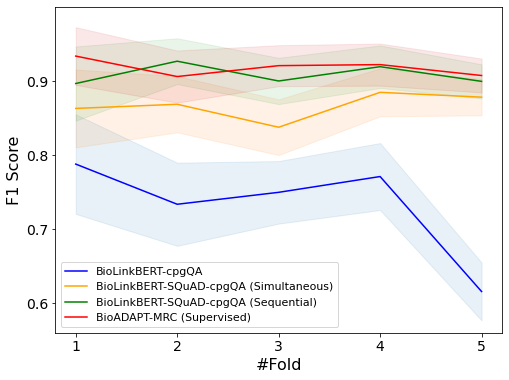

In [71]:
import matplotlib as mpl
label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

x = range(1,6)
colors = ['blue', 'orange', 'green', 'red']
labels = ['BioLinkBERT-cpgQA',
          'BioLinkBERT-SQuAD-cpgQA (Simultaneous)',
          'BioLinkBERT-SQuAD-cpgQA (Sequential)',
          'BioADAPT-MRC (Supervised)']

# labels = ['Traditional learning', 'Sequential learning']

fig, ax = plt.subplots(1,1, figsize=(8,6))


ax.plot(x,
       target_only_f1,
       color=colors[0],
       label = labels[0]
        )
ax.fill_between(x, yl_target_only_f1, yu_target_only_f1, alpha=0.1, color=f'tab:{colors[0]}')
ax.plot(x,
       simultaneous_f1,
       color=colors[1],
       label = labels[1]
        )
ax.fill_between(x, yl_simultaneous_f1, yu_simultaneous_f1, alpha=0.1, color=f'tab:{colors[1]}')
ax.plot(x,
       sequential_f1,
       color=colors[2],
       label = labels[2]
        )
ax.fill_between(x, yl_sequential_f1, yu_sequential_f1, alpha=0.1, color=f'tab:{colors[2]}')
ax.plot(x,
       bioadapt_f1,
       color=colors[3],
       label = labels[3]
        )
ax.fill_between(x, yl_bioadapt_f1, yu_bioadapt_f1, alpha=0.1, color=f'tab:{colors[3]}')

ax.legend(loc='best', fontsize =11)
ax.set_xlabel('#Fold', size=16)
ax.set_ylabel('F1 Score', size=16)
ax.set_ylim(0.56, 1)
ax.set_xticks(range(1,6))
ax.set_xticklabels(range(1,6), fontsize=14)
ax.set_yticks(np.arange(0.6, .94, 0.1))
ax.set_yticklabels([round(x,1) for x in np.arange(0.6, .94, 0.1)], fontsize=14)


plt.show()

In [69]:
# sns.lineplot(data=df, x="Folds", y="F1",
#              hue="Model",
#             palette='muted',
#             linestyle='-',
#             linewidth = 2,
#             alpha = 0.8
#             )